# Examples
### 1
Apply a production to a graph.

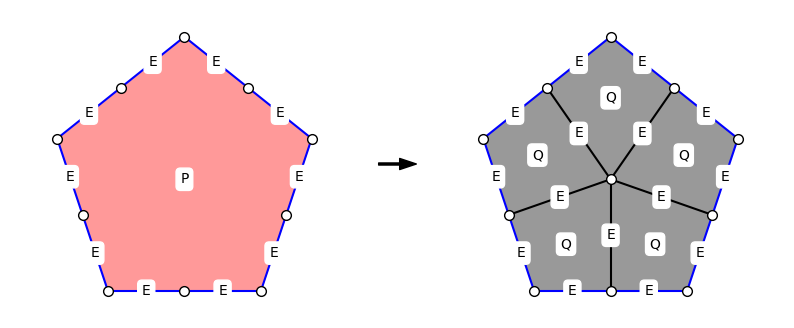

Druga aplikacja nie jest możliwa - brak pasującego podgrafu (LHS).


In [45]:
import matplotlib.pyplot as plt
import copy
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_8 import Prod8

def get_midpoint_name(v1, v2):
    s = sorted([v1, v2])
    return f"M_{s[0]}_{s[1]}"

def add_broken_edge(hg, v1, v2, coords):
    mid_name = get_midpoint_name(v1, v2)
    p1, p2 = coords[v1], coords[v2]
    hg.set_vertex_parameter(mid_name, {
        "x": (p1["x"] + p2["x"]) / 2,
        "y": (p1["y"] + p2["y"]) / 2
    })
    hg.add_edge(Edge(EdgeType.E, frozenset({v1, mid_name}), {"B": 1, "R": 0}))
    hg.add_edge(Edge(EdgeType.E, frozenset({mid_name, v2}), {"B": 1, "R": 0}))

hg = Hypergraph()
coords = {
    "V1": {"x": 1.0, "y": 1.5},
    "V2": {"x": 2.0, "y": 0.7},
    "V3": {"x": 1.6, "y": -0.5},
    "V4": {"x": 0.4, "y": -0.5},
    "V5": {"x": 0.0, "y": 0.7},
}
for v, c in coords.items():
    hg.set_vertex_parameter(v, c)

corners = ["V1", "V2", "V3", "V4", "V5"]
for i in range(5):
    add_broken_edge(hg, corners[i], corners[(i + 1) % 5], coords)

hg.add_edge(Edge(EdgeType.P, frozenset(corners), {"R": 1}))

hg_before = copy.deepcopy(hg)
prod8 = Prod8()
new_hg = prod8.apply(hg)

if new_hg:
    fig, (ax1, ax_arrow, ax2) = plt.subplots(1, 3, figsize=(10, 4), 
                                            gridspec_kw={'width_ratios': [1, 0.15, 1]})

    plt.sca(ax1)
    ax1.set_aspect('equal')
    hg_before.draw(use_positional_parameters=True)

    ax_arrow.axis('off')
    ax_arrow.annotate('', xy=(0.9, 0.5), xytext=(0.1, 0.5),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
    ax_arrow.text(0.5, 0.55, '', ha='center', va='bottom', fontweight='bold')

    plt.sca(ax2)
    ax2.set_aspect('equal')
    new_hg.draw(use_positional_parameters=True)

    plt.subplots_adjust(wspace=0.05)
    plt.show()

    second_hg = prod8.apply(new_hg)
    if second_hg:
        print("Druga aplikacja udana.")
        plt.figure(figsize=(5, 5))
        second_hg.draw(use_positional_parameters=True)
        plt.show()
    else:
        print("Druga aplikacja nie jest możliwa - brak pasującego podgrafu (LHS).")
else:
    print("Pierwsza aplikacja nie jest możliwa.")

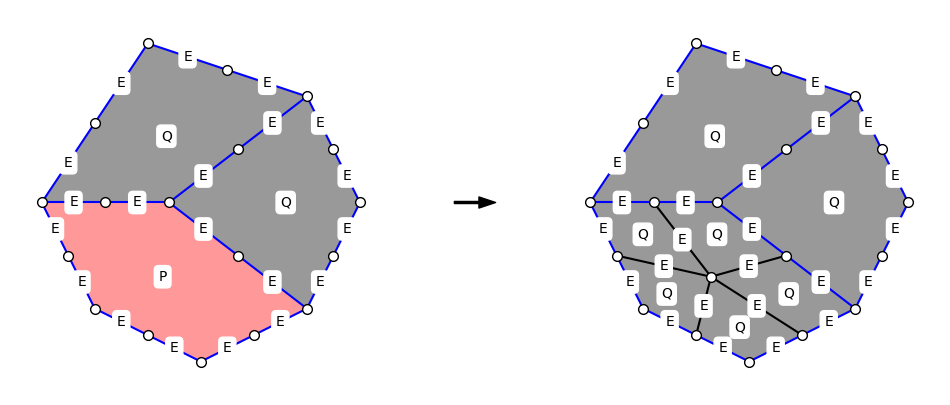

Druga aplikacja niemożliwa na tym samym elemencie.


In [46]:
import matplotlib.pyplot as plt
import copy
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_8 import Prod8

def get_midpoint_name(v1, v2):
    s = sorted([v1, v2])
    return f"M_{s[0]}_{s[1]}"

def add_broken_edge(hg, v1, v2, coords):
    mid_name = get_midpoint_name(v1, v2)
    p1, p2 = coords[v1], coords[v2]
    hg.set_vertex_parameter(mid_name, {
        "x": (p1["x"] + p2["x"]) / 2,
        "y": (p1["y"] + p2["y"]) / 2
    })
    hg.add_edge(Edge(EdgeType.E, frozenset({v1, mid_name}), {"B": 1, "R": 0}))
    hg.add_edge(Edge(EdgeType.E, frozenset({mid_name, v2}), {"B": 1, "R": 0}))

hg = Hypergraph()
coords = {
    "V1": {"x": 1.0, "y": 3.0}, "V2": {"x": 2.5, "y": 2.5},
    "V3": {"x": 3.0, "y": 1.5}, "V4": {"x": 2.5, "y": 0.5},
    "V5": {"x": 1.5, "y": 0.0}, "V6": {"x": 0.5, "y": 0.5},
    "V7": {"x": 0.0, "y": 1.5}, "V8": {"x": 1.2, "y": 1.5}
}
for v, c in coords.items():
    hg.set_vertex_parameter(v, c)

outer_cycle = ["V1", "V2", "V3", "V4", "V5", "V6", "V7"]
for i in range(len(outer_cycle)):
    add_broken_edge(hg, outer_cycle[i], outer_cycle[(i+1)%7], coords)

inner_conns = [("V8", "V7"), ("V8", "V2"), ("V8", "V4")]
for v_start, v_end in inner_conns:
    add_broken_edge(hg, v_start, v_end, coords)

p1_corners = ["V4", "V5", "V6", "V7", "V8"]
q1_corners = ["V2", "V3", "V4", "V8"]
q2_corners = ["V7", "V1", "V2", "V8"]

hg.add_edge(Edge(EdgeType.P, frozenset(p1_corners), {"R": 1}))
hg.add_edge(Edge(EdgeType.Q, frozenset(q1_corners), {"R": 0}))
hg.add_edge(Edge(EdgeType.Q, frozenset(q2_corners), {"R": 0}))

hg_before = copy.deepcopy(hg)
prod8 = Prod8()
new_hg = prod8.apply(hg)

if new_hg:
    fig, (ax1, ax_arrow, ax2) = plt.subplots(1, 3, figsize=(12, 5), 
                                            gridspec_kw={'width_ratios': [1, 0.15, 1]})
    plt.sca(ax1)
    ax1.set_aspect('equal')
    hg_before.draw(use_positional_parameters=True)
    
    ax_arrow.axis('off')
    ax_arrow.annotate('', xy=(0.9, 0.5), xytext=(0.1, 0.5),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
    
    plt.sca(ax2)
    ax2.set_aspect('equal')
    new_hg.draw(use_positional_parameters=True)
    plt.show()

    second_hg = prod8.apply(new_hg)
    if second_hg:
        print("Można zastosować ponownie.")
    else:
        print("Druga aplikacja niemożliwa na tym samym elemencie.")

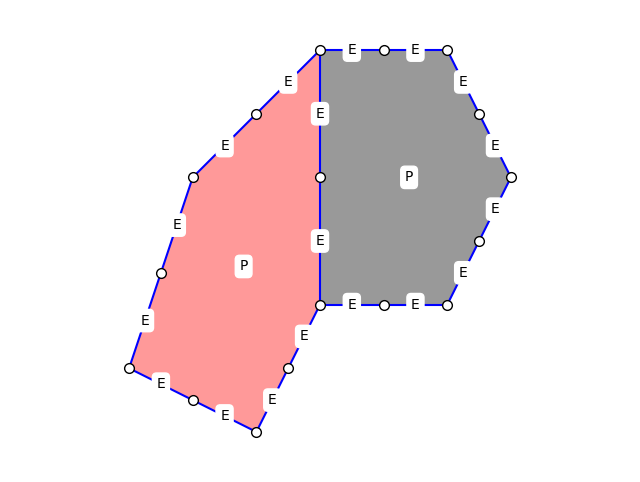

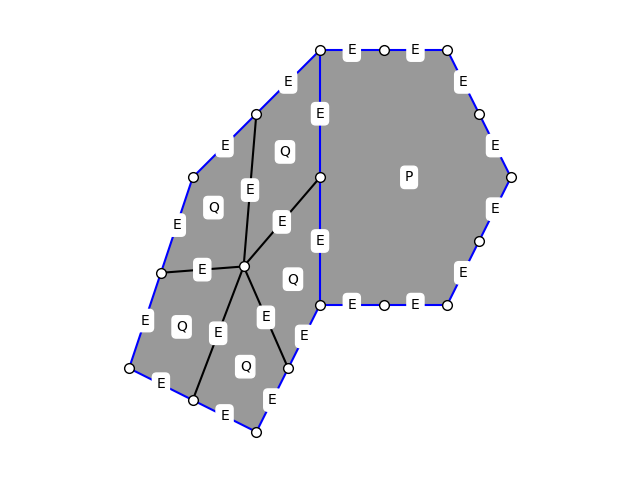

In [47]:
import matplotlib.pyplot as plt
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_8 import Prod8

def get_midpoint_name(v1, v2):
    s = sorted([v1, v2])
    return f"M_{s[0]}_{s[1]}"

def add_broken_edge(hg, v1, v2, coords):
    mid_name = get_midpoint_name(v1, v2)
    existing_verts = [v for edge in hg.get_edges() for v in edge.get_vertices()]

    if mid_name not in existing_verts:
        p1 = coords[v1]
        p2 = coords[v2]
        hg.set_vertex_parameter(mid_name, {
            "x": (p1["x"] + p2["x"]) / 2,
            "y": (p1["y"] + p2["y"]) / 2
        })

    e1 = Edge(EdgeType.E, frozenset({v1, mid_name}), {"R": 0, "B": 1})
    e2 = Edge(EdgeType.E, frozenset({mid_name, v2}), {"R": 0, "B": 1})

    current_edges = list(hg.get_edges())
    if not any(e.get_vertices() == e1.get_vertices() for e in current_edges):
        hg.add_edge(e1)
    if not any(e.get_vertices() == e2.get_vertices() for e in current_edges):
        hg.add_edge(e2)

hg = Hypergraph()

coords = {
    "V1": {"x": 0.0, "y": 2.0}, "V2": {"x": 2.0, "y": 4.0},
    "V3": {"x": 2.0, "y": 0.0}, "V4": {"x": 1.0, "y": -2.0},
    "V5": {"x": -1.0, "y": -1.0},
    "V6": {"x": 4.0, "y": 4.0}, "V7": {"x": 5.0, "y": 2.0},
    "V8": {"x": 4.0, "y": 0.0},
}

for v, c in coords.items():
    hg.set_vertex_parameter(v, c)

p1_corners = ["V1", "V2", "V3", "V4", "V5"]
p2_corners = ["V2", "V6", "V7", "V8", "V3"]

for i in range(5):
    add_broken_edge(hg, p1_corners[i], p1_corners[(i + 1) % 5], coords)
for i in range(5):
    add_broken_edge(hg, p2_corners[i], p2_corners[(i + 1) % 5], coords)

hg.add_edge(Edge(EdgeType.P, frozenset(p1_corners), {"R": 1, "B": 0}))
hg.add_edge(Edge(EdgeType.P, frozenset(p2_corners), {"R": 0, "B": 0}))

plt.figure(figsize=(8, 6))
hg.draw(use_positional_parameters=True)

prod8 = Prod8()
new_hg = prod8.apply(hg)

if new_hg:
    plt.figure(figsize=(8, 6))
    new_hg.draw(use_positional_parameters=True)

    new_hg_2 = prod8.apply(new_hg)
    
    if new_hg_2:
        plt.figure(figsize=(8, 6))
        new_hg_2.draw(use_positional_parameters=True)

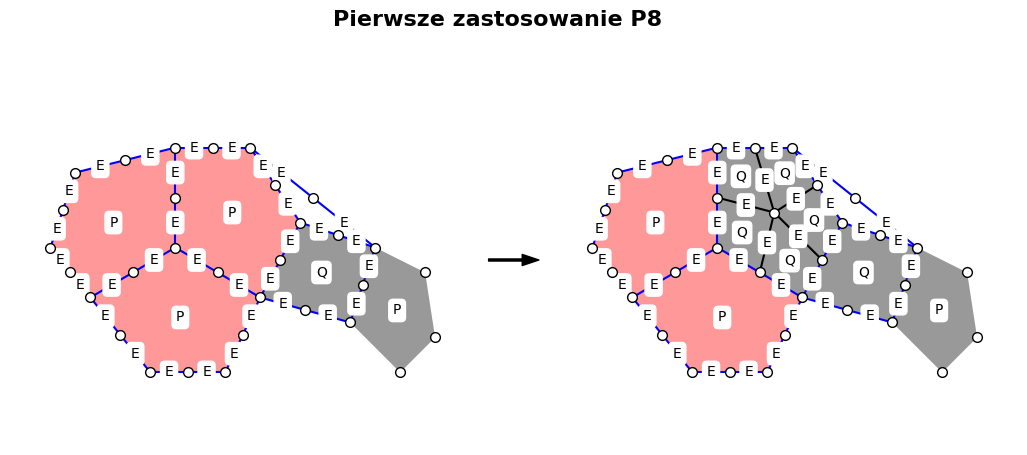

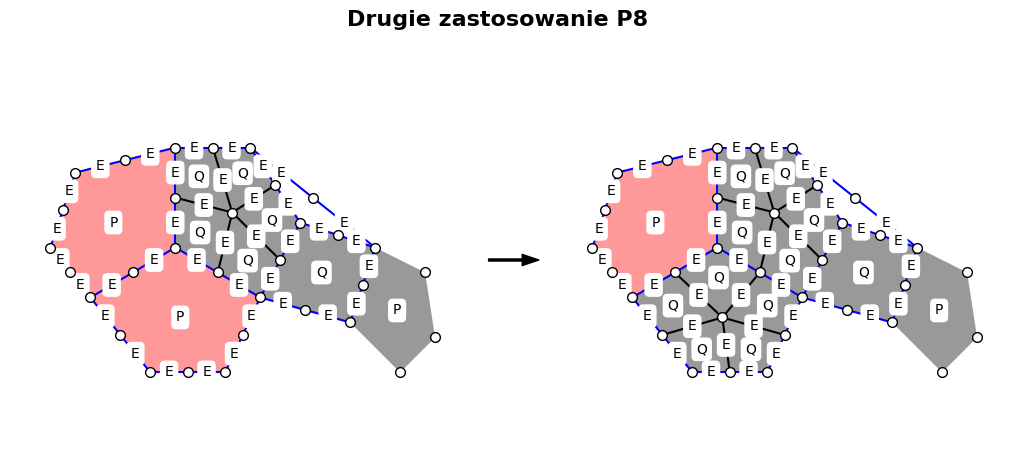

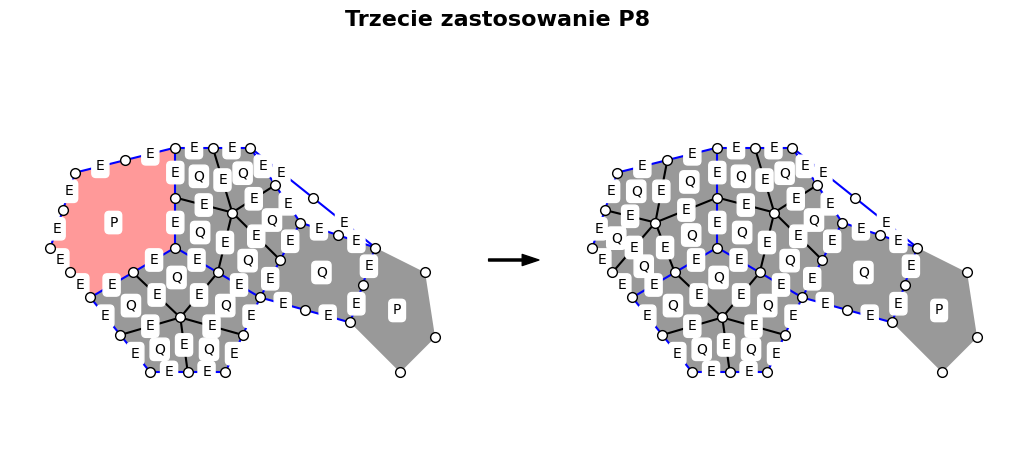

Czwarte zastosowanie nie jest możliwe - brak pasującego podgrafu (LHS).


In [48]:
import matplotlib.pyplot as plt
import copy
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_8 import Prod8

def get_midpoint_name(v1, v2):
    s = sorted([v1, v2])
    return f"M_{s[0]}_{s[1]}"

def add_broken_edge(hg, v1, v2, coords, r_val=0):
    mid_name = get_midpoint_name(v1, v2)
    existing_nodes = set()
    for edge in hg.get_edges():
        existing_nodes.update(edge.get_vertices())
    if mid_name not in existing_nodes:
        p1, p2 = coords[v1], coords[v2]
        hg.set_vertex_parameter(mid_name, {"x": (p1["x"] + p2["x"]) / 2, "y": (p1["y"] + p2["y"]) / 2})
    hg.add_edge(Edge(EdgeType.E, frozenset({v1, mid_name}), {"R": r_val, "B": 1}))
    hg.add_edge(Edge(EdgeType.E, frozenset({mid_name, v2}), {"R": r_val, "B": 1}))

hg = Hypergraph()
coords = {
    "V2": {"x": 0, "y": 0}, "V1": {"x": 0, "y": 2}, "V3": {"x": -1.7, "y": -1},
    "V8": {"x": 1.7, "y": -1}, "V5": {"x": -2, "y": 1.5}, "V4": {"x": -2.5, "y": 0},
    "V7": {"x": 2.5, "y": 0.5}, "V6": {"x": 1.5, "y": 2}, "V11": {"x": -0.5, "y": -2.5},
    "V10": {"x": 1, "y": -2.5}, "V12": {"x": 4.0, "y": 0.0}, "V13": {"x": 3.5, "y": -1.5},
    "V17": {"x": 5.0, "y": -0.5}, "V18": {"x": 5.2, "y": -1.8}, "V19": {"x": 4.5, "y": -2.5}
}
for v, c in coords.items(): hg.set_vertex_parameter(v, c)

p1, p2, p3 = ["V2", "V1", "V5", "V4", "V3"], ["V2", "V8", "V7", "V6", "V1"], ["V2", "V3", "V11", "V10", "V8"]
q1 = ["V7", "V12", "V13", "V8"]
p4_inactive = ["V12", "V17", "V18", "V19", "V13"]

for poly in [p1, p2, p3, q1]:
    for i in range(len(poly)):
        add_broken_edge(hg, poly[i], poly[(i + 1) % len(poly)], coords)

add_broken_edge(hg, "V6", "V12", coords)

hg.add_edge(Edge(EdgeType.P, frozenset(p1), {"R": 1, "B": 0}))
hg.add_edge(Edge(EdgeType.P, frozenset(p2), {"R": 1, "B": 0}))
hg.add_edge(Edge(EdgeType.P, frozenset(p3), {"R": 1, "B": 0}))
hg.add_edge(Edge(EdgeType.Q, frozenset(q1), {"R": 0, "B": 0}))

hg.add_edge(Edge(EdgeType.P, frozenset(p4_inactive), {"R": 0, "B": 0}))

prod8 = Prod8()
current_hg = hg
ordinals = ["Pierwsze", "Drugie", "Trzecie", "Czwarte"]

for step in range(1, 5):
    hg_before = copy.deepcopy(current_hg)
    result_hg = prod8.apply(current_hg)
    if result_hg:
        fig, (ax1, ax_arrow, ax2) = plt.subplots(1, 3, figsize=(13, 5), gridspec_kw={'width_ratios': [1, 0.15, 1]})
        fig.suptitle(f"{ordinals[step-1]} zastosowanie P8", fontsize=16, fontweight='bold', y=0.98)
        for ax, g in zip([ax1, ax2], [hg_before, result_hg]):
            plt.sca(ax); ax.set_aspect('equal'); ax.axis('off')
            g.draw(use_positional_parameters=True)
        ax_arrow.axis('off')
        ax_arrow.annotate('', xy=(0.9, 0.5), xytext=(0.1, 0.5), arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
        plt.subplots_adjust(wspace=0.01, top=0.85); plt.show()
        current_hg = result_hg
    else:
        print(f"{ordinals[step-1]} zastosowanie nie jest możliwe - brak pasującego podgrafu (LHS).")
        break